In [4]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('Block.csv',encoding='gb2312',usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
columns = list(df.columns)
# df = df.loc[df['food'] != 0]
df = df.fillna(0)
values = df.values
min_max_scaler = preprocessing.MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values)
df = pd.DataFrame(values_scaled, columns=columns)
df


,total_count,food,food_avg_spending,shopping,car,health,pet,education,life_service,entertainment,beauty,film_performance,sports,tourism,population_density
0,1.000000,1.000000,0.111776,0.791322,0.681941,0.866834,0.649798,1.000000,0.932249,0.878840,0.974446,0.148515,0.952381,1.000000,0.079487
1,0.851043,0.858374,0.259216,0.694215,0.574124,0.399497,0.787449,0.813953,0.867209,0.761092,0.734242,0.727723,0.993197,0.055794,0.179169
2,0.807573,0.844828,0.142898,0.557851,0.681941,0.557789,0.844130,0.875969,0.720867,0.711604,0.788756,0.143564,0.843537,0.527897,0.206967
3,0.800811,0.027094,0.131300,0.712810,0.714286,0.565327,1.000000,0.922481,1.000000,0.786689,0.839864,0.331683,0.952381,0.909871,0.241951
4,0.789606,0.443350,0.278125,0.780992,0.528302,0.530151,0.445344,0.823643,0.813008,0.890785,0.821124,0.500000,0.941043,0.351931,0.297039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000140
205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002710,0.000000,0.000000,0.000000,0.000000,0.000000,0.008040
206,0.000000,0.000000,0.000000,0.000000,0.000000,0.002513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008153
207,0.000000,0.000000,0.000000,0.000000,0.002695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006045


In [23]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(df)

GM=GaussianMixture(n_components=10)
GM.fit(df)

GaussianMixture(n_components=10)

In [24]:
#print(kmeans.labels_)

df['GaussianMixture_result'] = GM.predict(df)
df['Kmeans_result'] = kmeans.labels_

df.to_csv('拟合结果4')


In [25]:
result = pd.read_csv('拟合结果4')
town = pd.read_csv('Block.csv', encoding='gb2312', usecols=[0])
result = town.join(result)

# for row in result.iterrows():
#     if row['GaussianMixture_result'] == row['Kmeans_result']:
#         print(row)
# plt.figure()
# result.plot.scatter(x='index', y='population_density',
#                     c='Kmeans_result', cmap=plt.get_cmap('jet'), colorbar=False, title='k means')
# result.plot.scatter(x='index', y='population_density',
#                     c='GaussianMixture_result', cmap=plt.get_cmap('jet'), colorbar=False, title='gaussian')
result.to_csv('拟合结果带街道.csv')


功能区：
* 底图 - 市政府
* 指数：Diversity Index - benchmark: 混合 / 某一类
* 3种machine learning model 解释3种model为什么不一样

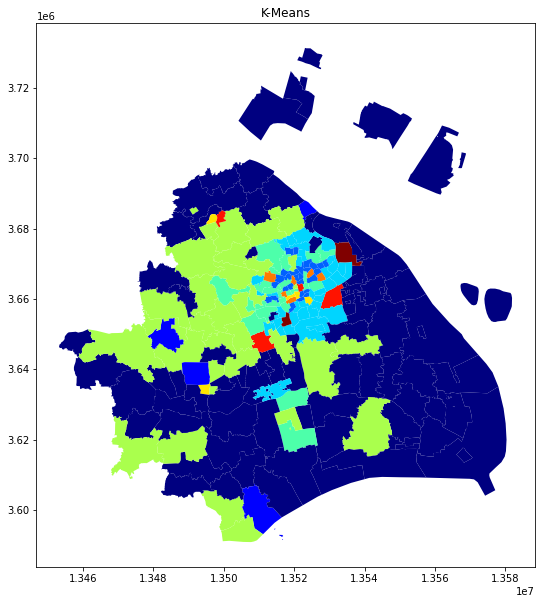

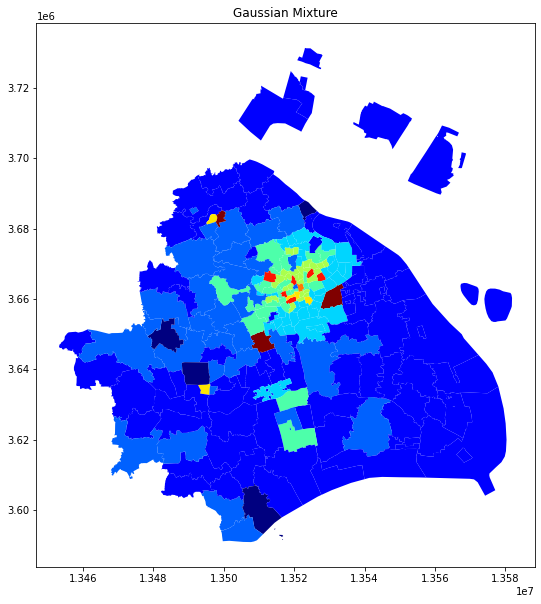

In [26]:
shanghai_towns = gpd.read_file('上海街道/上海街道.shp')
joined_by_towns = shanghai_towns.join(result.set_index('town'), on='town')

joined_by_towns.plot(cmap=plt.get_cmap('jet'), column='Kmeans_result', figsize=(10,10))
plt.title('K-Means')
plt.show()
joined_by_towns.plot(cmap=plt.get_cmap(
    'jet'), column='GaussianMixture_result', figsize=(10, 10))
plt.title('Gaussian Mixture')
plt.show()
